In [1]:
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import geopandas as gpd # For reading in shapefiles
import numpy as np
import sys # For displaying package versions
import os # For managing directories and file paths if drive is mounted

from pyincore import IncoreClient, Dataset, FragilityService, MappingSet, DataService, FragilityCurveSet
from pyincore.analyses.buildingdamage.buildingdamage import BuildingDamage

from pyincore_viz.geoutil import GeoUtil as viz
from pyincore_viz.plotutil import PlotUtil as plot

In [2]:
from pyincore import FragilityService, IncoreClient
from pyincore import Mapping, MappingSet, FragilityCurveSet

In [3]:
# IN-CORE client
client = IncoreClient()

# Initiate fragility service
fragility_services = FragilityService(client)

Enter username:  mharati1987
Enter password:  ········


Connection successful to IN-CORE services. pyIncore version detected: 1.12.0


In [4]:
fragility_data = {
    "description": "W23 in Seaside Testbed (Tsunami-only fragility curve - 2D)",
    "authors": [
        "Harati & van de Lindt (2024a)"
    ],
    "resultType": "Limit State",
    "hazardType": "tsunami",
    "inventoryType": "building",
    "creator": "incore",
    "spaces": [
        "coe"
    ],
    "demandTypes": [
        "Mmax"
    ],
    "demandUnits": [
        "m^3/s^2"
    ],
    "fragilityCurves": [
        {
            "description": "legacy - StandardFragilityCurve - Immediate Occupancy",
            "rules": [
                {
                    "condition": [
                        "Mmax > 0"
                    ],
                    "expression": "scipy.stats.norm.cdf(math.log(Mmax), 4.1334,0.1547)"
                }
            ],
            "returnType": {
                "type": "Limit State",
                "unit": "",
                "description": "LS_0"
            },
        },
        {
            "description": "legacy - StandardFragilityCurve - Life Safety",
            "rules": [
                {
                    "condition": [
                        "Mmax > 0"
                    ],
                    "expression": "scipy.stats.norm.cdf(math.log(Mmax), 4.4602,0.1348)"
                }
            ],
            "returnType": {
                "type": "Limit State",
                "unit": "",
                "description": "LS_1"
            },
        },
        {
            "description": "legacy - StandardFragilityCurve - Collapse Prevention",
            "rules": [
                {
                    "condition": [
                        "Mmax > 0"
                    ],
                    "expression": "scipy.stats.norm.cdf(math.log(Mmax), 4.7424,0.1415)"
                }
            ],
            "returnType": {
                "type": "Limit State",
                "unit": "",
                "description": "LS_2"
            },
        }
    ],
    "curveParameters": [
        {
            "name": "Mmax",
            "unit": "m^3/s^2",
            "description": "Mmax value from hazard service",
            "fullName": "Mmax",
        }
    ]
}



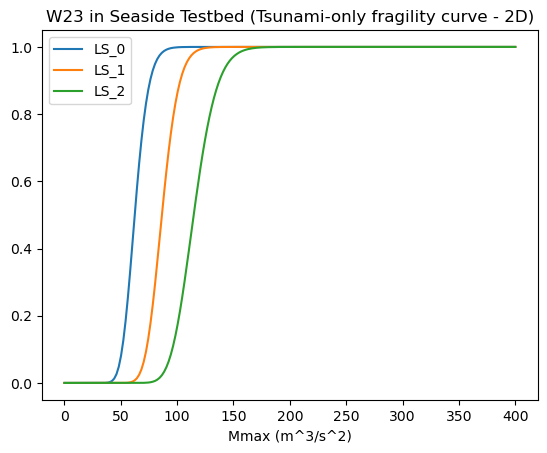

In [5]:
# construct the fragility curve object to use
fragility_curve_set = FragilityCurveSet(fragility_data)
fragility_curve_set
from pyincore_viz.plotutil import PlotUtil as plot
plt = plot.get_fragility_plot(fragility_curve_set, start=0, end=400)

In [6]:
created_fragility = fragility_services.create_dfr3_set(fragility_data)
created_fragility

{'id': '67ae5e784dd89e134e4c8b67',
 'description': 'W23 in Seaside Testbed (Tsunami-only fragility curve - 2D)',
 'authors': ['Harati & van de Lindt (2024a)'],
 'paperReference': None,
 'resultUnit': None,
 'resultType': 'Limit State',
 'hazardType': 'tsunami',
 'inventoryType': 'building',
 'creator': 'mharati1987',
 'owner': 'mharati1987',
 'curveParameters': [{'name': 'Mmax',
   'unit': 'm^3/s^2',
   'description': 'Mmax value from hazard service',
   'fullName': 'Mmax',
   'expression': None}],
 'spaces': ['mharati1987'],
 'demandTypes': ['Mmax'],
 'demandUnits': ['m^3/s^2'],
 'fragilityCurves': [{'description': 'legacy - StandardFragilityCurve - Immediate Occupancy',
   'rules': [{'condition': ['Mmax > 0'],
     'expression': 'scipy.stats.norm.cdf(math.log(Mmax), 4.1334,0.1547)'}],
   'returnType': {'type': 'Limit State', 'unit': '', 'description': 'LS_0'},
   'curveParameters': None},
  {'description': 'legacy - StandardFragilityCurve - Life Safety',
   'rules': [{'condition': ['

In [7]:
fragility_data1 = {
    "description": "W23 in Seaside Testbed for Mainshock + Aftershock",
    "authors": [
        "Harati & van de Lindt (2024b)"
    ],
    "resultType": "Limit State",
    "hazardType": "earthquake",
    "inventoryType": "building",
    "creator": "incore",
    "spaces": [
        "coe"
    ],
    "demandTypes": [
        "0.75 sec SA"    #...............
    ],
    "demandUnits": [
        "g"
    ],
    "fragilityCurves": [
        {
            "description": "legacy - StandardFragilityCurve - Immediate Occupancy",
            "rules": [
                {
                    "condition": [
                        "zero_point_seven_five_sa > 0"
                    ],
                    "expression": "scipy.stats.norm.cdf(math.log(zero_point_seven_five_sa), 0.0984,0.2824)"
                }
            ],
            "returnType": {
                "type": "Limit State",
                "unit": "",
                "description": "LS_0"
            },
        },
        {
            "description": "legacy - StandardFragilityCurve - Life Safety",
            "rules": [
                {
                    "condition": [
                        "zero_point_seven_five_sa > 0"
                    ],
                    "expression": "scipy.stats.norm.cdf(math.log(zero_point_seven_five_sa), 0.5445,0.3270)"
                }
            ],
            "returnType": {
                "type": "Limit State",
                "unit": "",
                "description": "LS_1"
            },
        },
        {
            "description": "legacy - StandardFragilityCurve - Collapse Prevention",
            "rules": [
                {
                    "condition": [
                        "zero_point_seven_five_sa > 0"
                    ],
                    "expression": "scipy.stats.norm.cdf(math.log(zero_point_seven_five_sa), 1.0262,0.3829)"
                }
            ],
            "returnType": {
                "type": "Limit State",
                "unit": "",
                "description": "LS_2"
            },
        }
    ],
    "curveParameters": [
        {
            "name": "zero_point_seven_five_sa",   #...............  6511eef580ae994ab933c81f
            "unit": "g",
            "description": "zero_point_seven_five_sa value from hazard service",
            "fullName": "0.75 sec SA",   #...............
        }
    ]
}



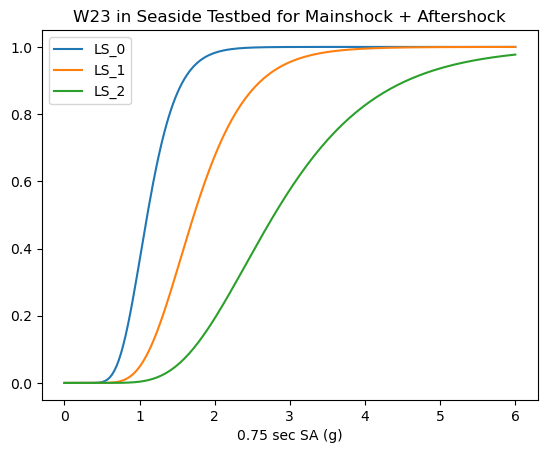

In [8]:
# construct the fragility curve object to use
fragility_curve_set1 = FragilityCurveSet(fragility_data1)
fragility_curve_set1
from pyincore_viz.plotutil import PlotUtil as plot
plt = plot.get_fragility_plot(fragility_curve_set1, start=0, end=6)

In [9]:
created_fragility1 = fragility_services.create_dfr3_set(fragility_data1)
created_fragility1

{'id': '67ae5e84a040ca17c74137d3',
 'description': 'W23 in Seaside Testbed for Mainshock + Aftershock',
 'authors': ['Harati & van de Lindt (2024b)'],
 'paperReference': None,
 'resultUnit': None,
 'resultType': 'Limit State',
 'hazardType': 'earthquake',
 'inventoryType': 'building',
 'creator': 'mharati1987',
 'owner': 'mharati1987',
 'curveParameters': [{'name': 'zero_point_seven_five_sa',
   'unit': 'g',
   'description': 'zero_point_seven_five_sa value from hazard service',
   'fullName': '0.75 sec SA',
   'expression': None}],
 'spaces': ['mharati1987'],
 'demandTypes': ['0.75 sec SA'],
 'demandUnits': ['g'],
 'fragilityCurves': [{'description': 'legacy - StandardFragilityCurve - Immediate Occupancy',
   'rules': [{'condition': ['zero_point_seven_five_sa > 0'],
     'expression': 'scipy.stats.norm.cdf(math.log(zero_point_seven_five_sa), 0.0984,0.2824)'}],
   'returnType': {'type': 'Limit State', 'unit': '', 'description': 'LS_0'},
   'curveParameters': None},
  {'description': 'l

In [10]:
fragility_data2 = {
    "description": "F4 for contents fragility in Seaside Testbed (Flood-only 2D fragility)",
    "authors": [
        "Harati & van de Lindt (2024b)"
    ],
    "resultType": "Limit State",
    "hazardType": "earthquake",
    "inventoryType": "building",
    "creator": "incore",
    "spaces": [
        "coe"
    ],
    "demandTypes": [
        "zero_point_seven_five_sa"    #...............
    ],
    "demandUnits": [
        "m"
    ],
    "fragilityCurves": [
        {
            "description": "legacy - StandardFragilityCurve - Immediate Occupancy",
            "rules": [
                {
                    "condition": [
                        "zero_point_seven_five_sa > 0"
                    ],
                    "expression": "scipy.stats.norm.cdf(math.log(zero_point_seven_five_sa), -1.666,0.553)"
                }
            ],
            "returnType": {
                "type": "Limit State",
                "unit": "",
                "description": "LS_0"
            },
        },
        {
            "description": "legacy - StandardFragilityCurve - Life Safety",
            "rules": [
                {
                    "condition": [
                        "zero_point_seven_five_sa > 0"
                    ],
                    "expression": "scipy.stats.norm.cdf(math.log(zero_point_seven_five_sa), -0.984,0.798)"
                }
            ],
            "returnType": {
                "type": "Limit State",
                "unit": "",
                "description": "LS_1"
            },
        },
        {
            "description": "legacy - StandardFragilityCurve - Collapse Prevention",
            "rules": [
                {
                    "condition": [
                        "zero_point_seven_five_sa > 0"
                    ],
                    "expression": "scipy.stats.norm.cdf(math.log(zero_point_seven_five_sa), 1.214,0.288)"
                }
            ],
            "returnType": {
                "type": "Limit State",
                "unit": "",
                "description": "LS_2"
            },
        }
    ],
    "curveParameters": [
        {
            "name": "zero_point_seven_five_sa",   #...............
            "unit": "m",
            "description": "zero_point_seven_five_sa value from hazard service",
            "fullName": "zero_point_seven_five_sa",   #...............
        }
    ]
}



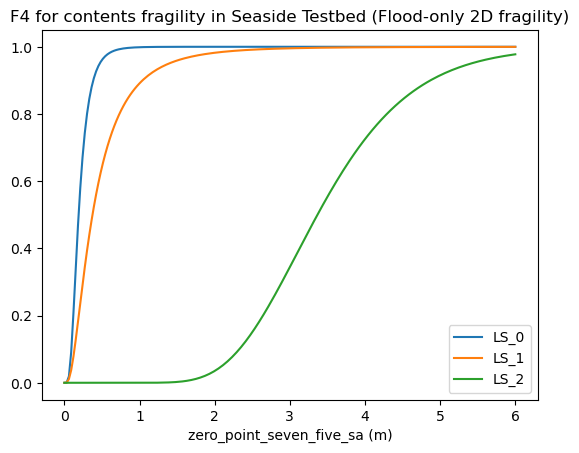

In [11]:
# construct the fragility curve object to use
fragility_curve_set2 = FragilityCurveSet(fragility_data2)
fragility_curve_set2
from pyincore_viz.plotutil import PlotUtil as plot
plt = plot.get_fragility_plot(fragility_curve_set2, start=0, end=6)